# 数据探索性分析与数据预处理——Wine Reviews

代码仓库链接:https://github.com/gejingjing/Data-Mining/tree/master/homework1

## 1.数据预览

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
import numpy as np
import missingno as msno 
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import seaborn as sns
from sklearn import linear_model
from scipy import stats
pd.set_option('max_colwidth', 25)
csv_file = 'Wine Reviews\winemag-data_first150k.csv'
data = pd.read_csv(csv_file,index_col=0)
data.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, b...",Carodorum Selección E...,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the...,Special Selected Late...,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,This spent 20 months ...,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,This is the top wine ...,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## 2.数据摘要

### 2.1 标称属性

统计标称属性，给出每个可能取值的频数

观察数据得出标称属性有: country, description, designation, province, region_1, region_2, variety, winery

首先总览各标称属性的信息，包括：属性中样本个数，单独样本个数，频数最高的值以及频数

In [3]:
nom_att = ['country','description','designation','province','region_1','region_2', 'variety','winery']
data_nom = data[nom_att]
data_nom.describe().T

,count,unique,top,freq
country,150925,48,US,62397
description,150930,97821,Powerful in Zinny cha...,6
designation,105195,30621,Reserve,2752
province,150925,455,California,44508
region_1,125870,1236,Napa Valley,6209
region_2,60953,18,Central Coast,13057
variety,150930,632,Chardonnay,14482
winery,150930,14810,Williams Selyem,374


统计各个标称属性每个可能取值的频数，鉴于数据量太大，每个属性只展示频数最高的前十个

In [4]:
for att in nom_att:
    display(data_nom[att].value_counts()[:10])

US             62397
Italy          23478
France         21098
Spain           8268
Chile           5816
Argentina       5631
Portugal        5322
Australia       4957
New Zealand     3320
Austria         3057
Name: country, dtype: int64

Powerful in Zinny character, this blend of Dry Creek and Russian River grapes bursts with brawny flavors of wild berries, chocolate-covered mint, tobacco and pepper, wrapped into sturdy tannins. Shows real class and character.                                                  6
86-88 This could work as a rich wine, because there is good structure and piles of botrytis. It could be delicious, with its lovely dry finish, but that's for the future.                                                                                                          6
92-94 Barrel sample. A rounded wine, its tannins submerged into the ripe fruits. It feels soft, and there is just a bite of alcohol. The structure is soft, generous, opulent.                                                                                                      6
A little bit funky and unsettled when you pop the screwcap, but soon it finds its floral, blueberry base. Remains superficial and sweet in the mouth, with candied fla

Reserve           2752
Reserva           1810
Estate            1571
Barrel sample     1326
Riserva            754
Barrel Sample      639
Brut               624
Crianza            503
Estate Grown       449
Estate Bottled     396
Name: designation, dtype: int64

California          44508
Washington           9750
Tuscany              7281
Bordeaux             6111
Northern Spain       4892
Mendoza Province     4742
Oregon               4589
Burgundy             4308
Piedmont             4093
Veneto               3962
Name: province, dtype: int64

Napa Valley             6209
Columbia Valley (WA)    4975
Mendoza                 3586
Russian River Valley    3571
California              3462
Paso Robles             3053
Willamette Valley       2096
Rioja                   1893
Toscana                 1885
Sonoma County           1853
Name: region_1, dtype: int64

Central Coast              13057
Sonoma                     11258
Columbia Valley             9157
Napa                        8801
California Other            3516
Willamette Valley           3181
Mendocino/Lake Counties     2389
Sierra Foothills            1660
Napa-Sonoma                 1645
Finger Lakes                1510
Name: region_2, dtype: int64

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Sauvignon Blanc              6320
Syrah                        5825
Riesling                     5524
Merlot                       5070
Zinfandel                    3799
Name: variety, dtype: int64

Williams Selyem          374
Testarossa               274
DFJ Vinhos               258
Chateau Ste. Michelle    225
Columbia Crest           217
Kendall-Jackson          216
Concha y Toro            216
Trapiche                 205
Bouchard Père & Fils     203
Kenwood                  191
Name: winery, dtype: int64

### 2.2 数值属性

数值属性有：points, price

计算每个数值属性的五数概括，并统计缺失值个数

In [5]:
num_att =['points','price']
data_num = data[num_att]
null_count = DataFrame(data_num.isnull().sum())
describe = data_num.describe()[3:].T
describe['null']=null_count
describe


,min,25%,50%,75%,max,null
points,80.0,86.0,88.0,90.0,100.0,0
price,4.0,16.0,24.0,40.0,2300.0,13695


## 3.数据可视化 

### 3.1 利用直方图统计各标称数据分布

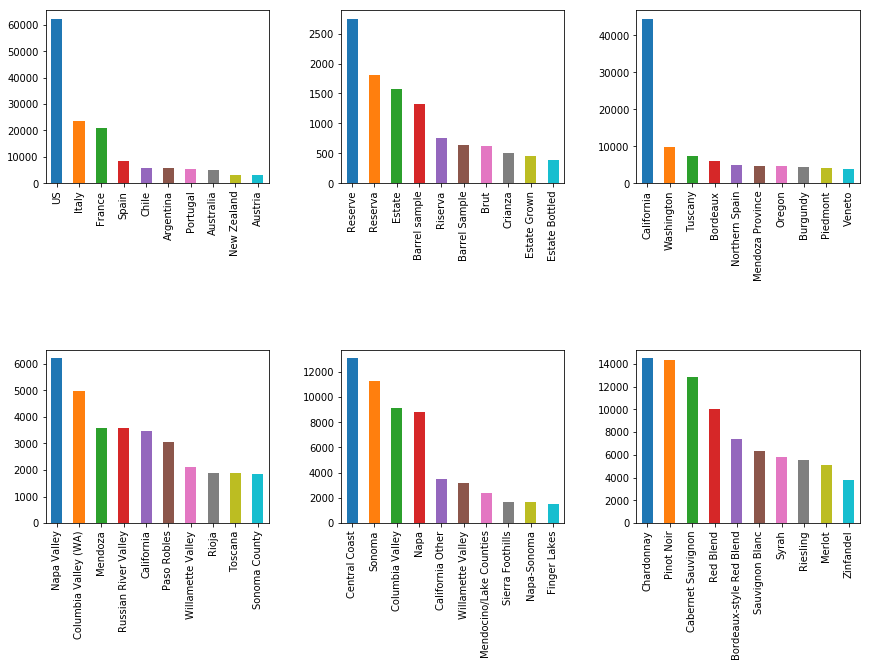

In [6]:
atts = ['country','designation','province','region_1','region_2','variety']
plt.figure(figsize=(12,12))
for i,att in enumerate(atts):
    plt.subplot(3,3,i+1)
    data_nom[att].value_counts().head(10).plot.bar()
plt.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)
plt.show()

### 3.2 使用直方图、盒图检查数据分布及离群点

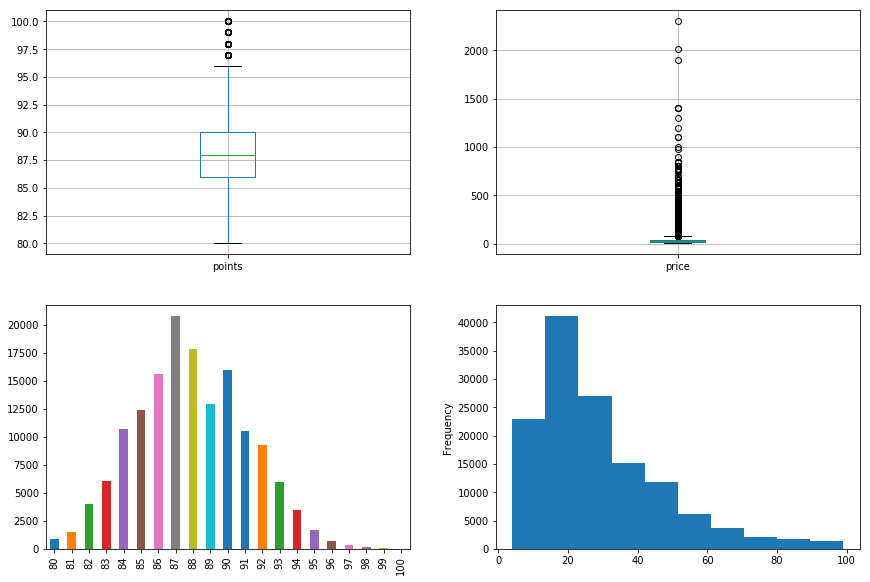

In [7]:
plt.figure(figsize=(12,8))
for i,att in enumerate(num_att):
    plt.subplot(2,2,i+1)
    DataFrame(data[att]).boxplot()
plt.subplot(2,2,3)
data['points'].value_counts().sort_index().plot.bar()
plt.subplot(2,2,4)
data[data['price']<100]['price'].plot.hist()
plt.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)
plt.show()

可以看出葡萄酒评分主要集中在83-93的范围内，符合正态分布，高分和低分的数量较少。

对于葡萄酒的价格，大部分葡萄酒的价格都很低，位于0-100之间，但是也存在大量的高价格离群点，因为高档葡萄酒价格昂贵

## 4.数据缺失的处理

### 4.1 缺失数据分析

首先统计所有属性的缺失值情况

In [8]:
DataFrame(data.isnull().sum(),columns=['null_count']).T

,country,description,designation,points,price,province,region_1,region_2,variety,winery
null_count,5,0,45735,0,13695,5,25060,89977,0,0


发现葡萄的种植园，价格以及葡萄酒的生成的地区都存在大量的缺失，分析原因应该是数据爬取过程中很难获取葡萄酒的酒庄，因此也无法获取庄园位置，位置信息的国家省份地区是挂勾的，因此导致连环缺失,容易发现国家和省份都缺失了5个，接下来通过可视化观察他们是否相关联。

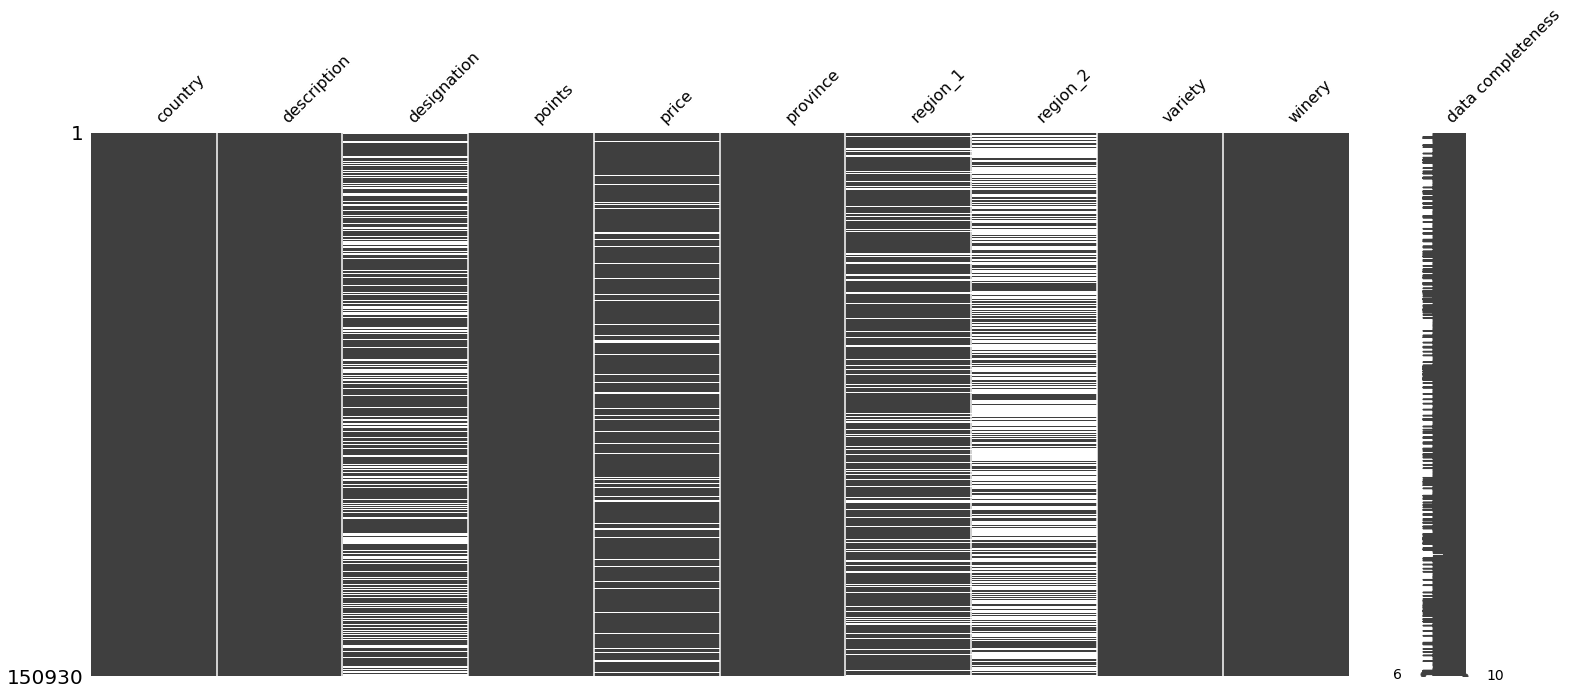

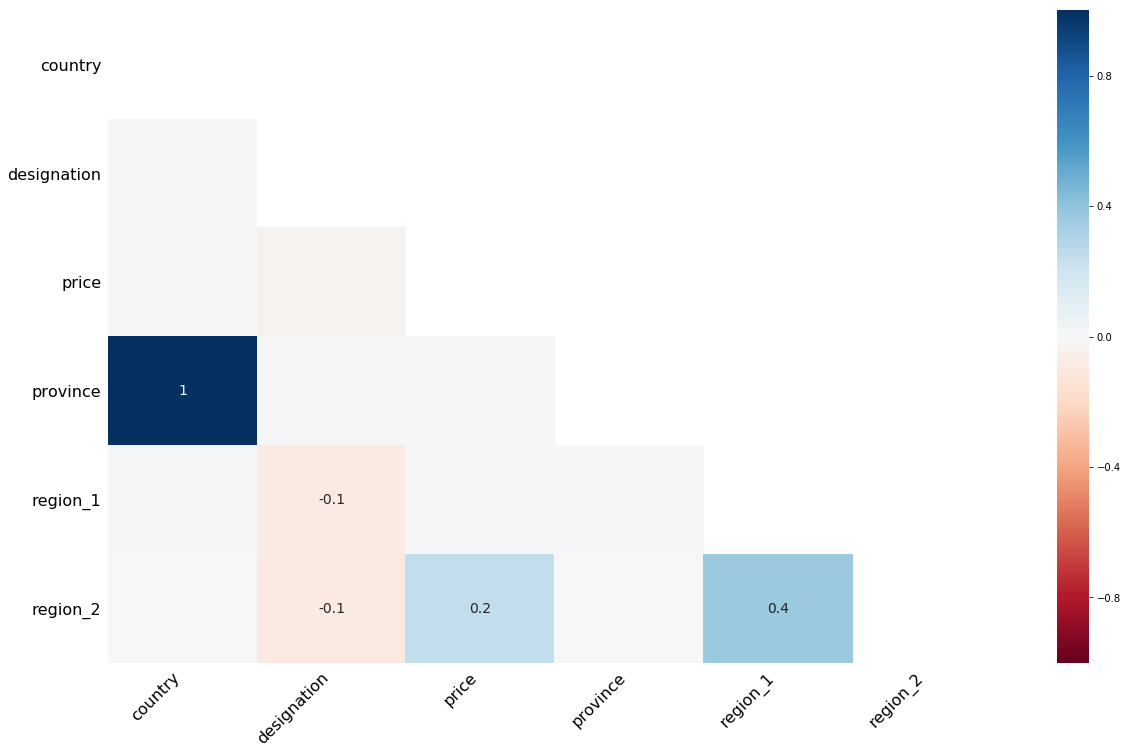

In [9]:
msno.matrix(data, labels=True)
msno.heatmap(data)

通过可视化缺失值情况可以看出，缺失情况的确是相关联的，并且国家和省份的缺失相关系数为1，说明了他们是同时缺失的，区域一、区域二和价格的缺失也有很高的关联性。

### 4.2 缺失值处理

#### 4.21 将缺失部分剔除

对于含有缺失值的行直接进行删除，这样不会影响后续的工作，适用于所有属性的缺失，前提是在缺失数据项较少的情况

In [19]:
data1 = data.copy(deep = True)
data1.dropna(axis=0, how='any', inplace=True)

#### 4.22 用最高频率值来填补缺失值

对于国家、葡萄园、省份、地区一、地区二这五个属性是一一对应相关联的，例如省份对应的国家是唯一的，因此这五个属性只能利用属性的相关关系来填补缺失值，不能使用单独属性的最高频率来填补缺失值，这样打破了他们之间的关联性，因此这里只对缺失的价格属性进行填充

In [11]:
data2 = data.copy(deep = True)
data2['price'].fillna(data2['price'].mode()[0],inplace=True)

#### 4.23 通过数据对象之间的相似性来填补缺失值

同上，国家、葡萄园、省份、地区一、地区二这五个属性不能利用相似来填充，对于价格属性，由于数据集中大多数属性都是标称属性，如果仅利用价格和评分两个数值属性计算样本距离不具有代表性，因此利用混合类型属性的相异性计算数据对象之间的相似度，即计算标称属性和数值属性的相异性矩阵

In [12]:
data3 = data.copy(deep = True)
unkonw = data3[data3['price'].isnull()]
loc = unkonw.index.tolist()[0] 
unkonw_nom = unkonw[nom_att]
unkonw_num = unkonw['points']
unkonw_isnull = unkonw.isnull()
konw = data3[data3['price'].notnull()]
konw_nom = konw[nom_att]
konw_num = konw['points']
konw_isnull = konw.isnull()

max_num = data3['points'].max()
min_num = data3['points'].min()
batch_size=1000
data_size = unkonw.shape[0]
n = int(data_size/batch_size)
res=[]
print('please waiting ......')
for i in range(n+1):
    start = i*batch_size
    end = min(start+batch_size,data_size)
    #print(str(start)+'---'+str(end))
    d_nom = (np.expand_dims(unkonw_nom[start:end],1)!= np.expand_dims(konw_nom,0)).sum(axis=2)
    d_nom = d_nom - (np.expand_dims(unkonw_isnull[nom_att][start:end],1) + np.expand_dims(konw_isnull[nom_att],0)).sum(axis=2)
    d_num=np.abs(np.expand_dims(unkonw_num[start:end],1)-np.expand_dims(konw_num,0))
    d_num=d_num/np.expand_dims(max_num-min_num,0)
    #d_num[np.isnan(d_nom)]=0
    #d_nom = d_nom.sum(axis=2)
    d_all = d_num + d_nom
    cnt = (1-(np.expand_dims(unkonw_isnull[start:end],1) + np.expand_dims(konw_isnull,0))).sum(axis=2)
    d = d_all/cnt
    res.extend(np.argmin(d,axis=1).tolist())
predicted = konw.iloc[res, 4]
data3.loc[(data3['price'].isnull()), 'price'] = predicted.values
display(pd.concat([DataFrame(unkonw.iloc[0]).T,DataFrame(konw.iloc[res[0]]).T,DataFrame(data3.iloc[loc]).T]))

please waiting ......


,country,description,designation,points,price,province,region_1,region_2,variety,winery
32,Italy,"Underbrush, scorched ...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
2741,Italy,Here's a delicious re...,Vigna Piaggia,95,65,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
32,Italy,"Underbrush, scorched ...",Vigna Piaggia,90,65,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga


为了观察结果是否正确，结果中第一行展示了了第一条价格缺失的数据对象，第二行是通过计算相异性找到的与之最相似的数据对象，可以发现找到的数据项与之非常相似，最后一行是对第一行数据利用找到的第二行数据的价格进行缺失值填充后的结果

#### 4.24 通过属性的相关关系来填补缺失值

首先利用卡方检验来确定哪些属性是与价格属性相关的，由于价格是连续值，因此通过区间划分将其转化为离散值

In [15]:
data4 = data.copy(deep = True)
cut_prices = [0,9,19,29,39,49,59,69,79,2300]
label_names = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80+"]
data4["cut_price"] = pd.cut(data4["price"],cut_prices,labels=label_names)
for cnt in data:
    tmp = data4[[cnt, 'cut_price']]
    contingency_table = pd.crosstab(
        tmp[cnt],
        tmp['cut_price'],
        #margins = True
    )
    f_obs = np.array(contingency_table.values)
    print(str(cnt),stats.chi2_contingency(f_obs)[:-1])

country (20326.33967074743, 0.0, 360)
description (1097711.003276253, 0.0, 712856)
designation (514267.0940959873, 0.0, 226760)
points (72296.55646173084, 0.0, 160)
price (1097880.0, 0.0, 2848)
province (49690.8654568458, 0.0, 3560)
region_1 (108319.97679576781, 0.0, 9568)
region_2 (24827.17028236869, 0.0, 136)
variety (52148.40928989633, 0.0, 4944)
winery (371176.08492303384, 0.0, 110808)


结果可以看出所有的属性与价格都有着相关性，接下来利用相关系数矩阵检查评分与价格是否有相关性，如果有的话可以直接利用评分进行回归分析

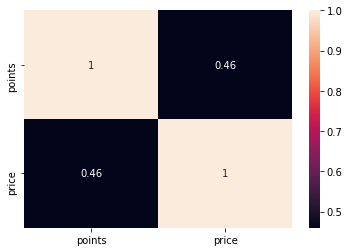

In [16]:
sns.heatmap(data.corr(),annot=True)

可以看出虽然评分和价格有相关性，但是比较弱，因此利用所有的属性通过随机森林算法来预测缺失的价格,将未缺失价格的数据项作为训练数据，价格作为训练标签，来训练随机森林模型，最后利用模型来预测缺失的价格，同样的对于其他五个缺失属性利用随机森林算法填充

In [17]:
data4 = data.copy(deep = True)
col_list = ['country','designation','points','province','region_1','region_2','variety','winery']
def processing(miss_col):
    if miss_col!='price':
        col_list.remove(miss_col)
    col_list.append(miss_col)
    process_df = data.loc[:, col_list].copy(deep = True)
    class_le = LabelEncoder()
    for i in col_list[:-1]:
        process_df.loc[:, i] = class_le.fit_transform(process_df.loc[:, i].values.astype(str))
    known = process_df[process_df[miss_col].notnull()].values
    known[:, -1] = class_le.fit_transform(known[:, -1])
    unknown = process_df[process_df[miss_col].isnull()].values
    X = known[:, :-1]
    y = known[:, -1]
    rfr = ensemble.RandomForestRegressor(random_state=1, n_estimators=200, max_depth=8, n_jobs=-1)
    rfr.fit(X, y)
    predicted = rfr.predict(unknown[:, :-1]).round(0).astype(int)
    predicted = class_le.inverse_transform(predicted)
    data4.loc[(data[miss_col].isnull()), miss_col] = predicted
processing('country')
processing('designation')
processing('price')
processing('province')
processing('region_1')
processing('region_2')

### 4.3 可视化对比新旧数据集

由于以上四种缺失值处理方法都适用于价格属性，因此，这里将其可视化进行对比观察

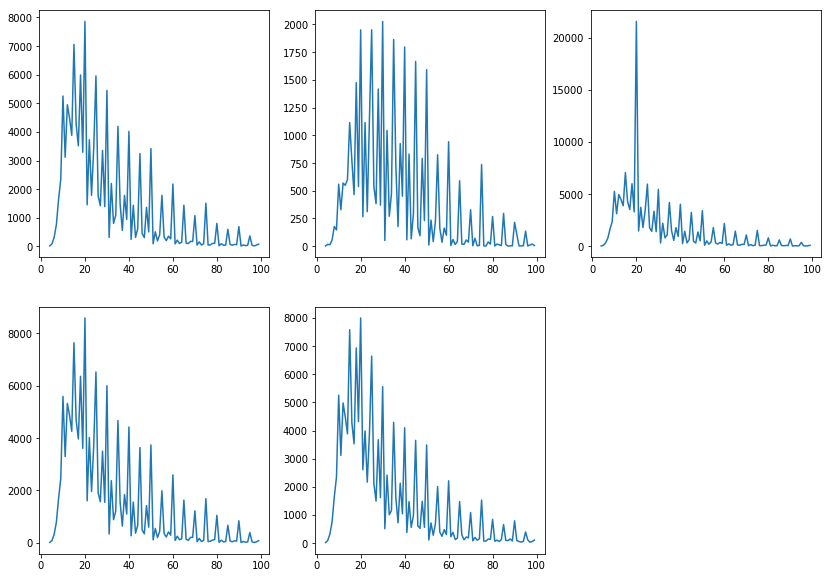

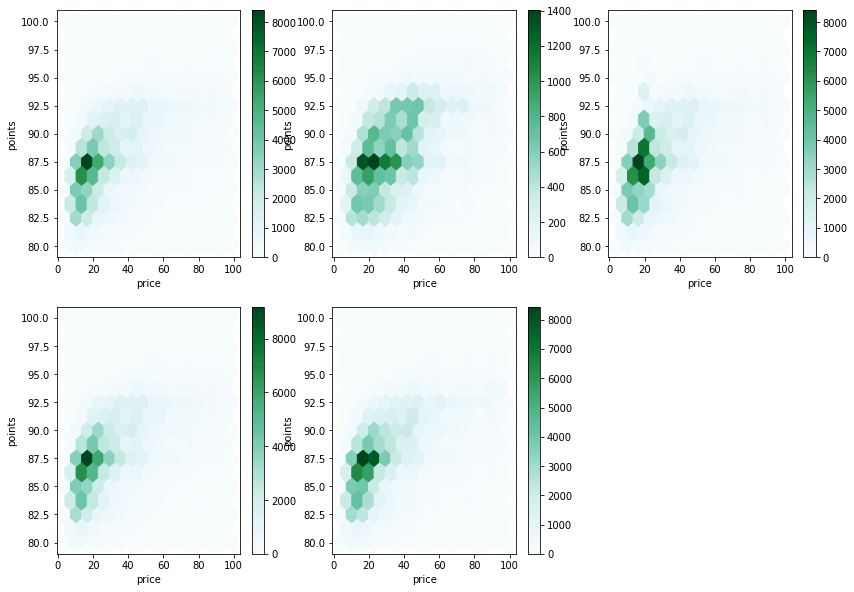

In [22]:
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
data[data['price'] < 100]['price'].value_counts().sort_index().plot.line()
plt.subplot(2,3,2)
data1[data1['price'] < 100]['price'].value_counts().sort_index().plot.line()
plt.subplot(2,3,3)
data2[data2['price'] < 100]['price'].value_counts().sort_index().plot.line()
plt.subplot(2,3,4)
data3[data3['price'] < 100]['price'].value_counts().sort_index().plot.line()
plt.subplot(2,3,5)
data4[data4['price'] < 100]['price'].value_counts().sort_index().plot.line()
fig = plt.figure(figsize=(14,10))
ax0 =fig.add_subplot(231)
ax1 =fig.add_subplot(232)
ax2 =fig.add_subplot(233)
ax3 =fig.add_subplot(234)
ax4 =fig.add_subplot(235)
data[data['price'] < 100].plot.hexbin(x='price', y='points', ax=ax0,gridsize=15)
data1[data1['price'] < 100].plot.hexbin(x='price', y='points', ax=ax1,gridsize=15)
data2[data2['price'] < 100].plot.hexbin(x='price', y='points', ax=ax2,gridsize=15)
data3[data3['price'] < 100].plot.hexbin(x='price', y='points', ax=ax3,gridsize=15)
data4[data4['price'] < 100].plot.hexbin(x='price', y='points', ax=ax4,gridsize=15)

首先绘制价格属性单变量的数据分布图，从左至右自上而下分别对应原数据集及缺失值处理的四种方法，可以看出前两种方法严重影响了数据分布，而最后两种方法都能很好的保持数据集的分布。

然后绘制了价格和评分的双变量热图，因为散点图有大量重复点不易观察，可以发现二者有着一定的线性关系，通过数据对象之间的相似性来填补缺失值很好的保持了两变量之间的关系，通过属性的相关关系来填补缺失值一定程度影响了二者的相关性。

综上对于当前数据集通过数据对象之间的相似性来填补缺失值是效果最好的，但是他存在计算量大，速度慢的问题。

## 5. winemag-data-130k-v2

新版本数据集中添加了评论的标题，品尝和评论该葡萄酒的人的姓名以及品尝该葡萄酒的人的Twitter名称，分析过程同上，以下不再赘述

In [23]:
csv_file = 'Wine Reviews\winemag-data-130k-v2.csv'
data = pd.read_csv(csv_file,index_col=0)
data.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,Aromas include tropic...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bi...,White Blend,Nicosia
1,Portugal,This is ripe and frui...,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2...,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the ...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot ...,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reser...,Riesling,St. Julian
4,US,Much like the regular...,Vintner's Reserve Wil...,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vin...,Pinot Noir,Sweet Cheeks


观察数据得出标称属性有: country, description, designation, province, region_1, region_2,taster_name,taster_twitter_handle,title,
variety, winery

In [24]:
nom_att = ['country','description','designation','province','region_1','region_2', 'taster_name','taster_twitter_handle','title','variety','winery']
data_nom = data[nom_att]
data_nom.describe().T

,count,unique,top,freq
country,129908,43,US,54504
description,129971,119955,Seductively tart in l...,3
designation,92506,37979,Reserve,2009
province,129908,425,California,36247
region_1,108724,1229,Napa Valley,4480
region_2,50511,17,Central Coast,11065
taster_name,103727,19,Roger Voss,25514
taster_twitter_handle,98758,15,@vossroger,25514
title,129971,118840,Gloria Ferrer NV Sono...,11
variety,129970,707,Pinot Noir,13272


In [25]:
for att in nom_att:
    display(data_nom[att].value_counts()[:10])

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64

Seductively tart in lemon pith, cranberry and pomegranate, this refreshing, light-bodied quaff is infinitely enjoyable, both on its own or at the table. It continues to expand on the palate into an increasing array of fresh flavors, finishing in cherry and orange.                                                                                              3
This zesty red has pretty aromas that suggest small red berry, blue flower and a whiff of moist soil. The vibrant palate offers sour cherry, pomegranate and a hint of anise alongside zesty acidity and refined tannins.                                                                                                                                             3
Cigar box, café au lait, and dried tobacco aromas are followed by coffee and cherry flavors, with barrel spices lingering on the finish. The wood gets a bit out front but it still delivers enjoyment.                                                                                 

Reserve           2009
Estate            1322
Reserva           1259
Riserva            698
Estate Grown       621
Brut               513
Dry                413
Barrel sample      375
Crianza            343
Estate Bottled     342
Name: designation, dtype: int64

California          36247
Washington           8639
Bordeaux             5941
Tuscany              5897
Oregon               5373
Burgundy             3980
Northern Spain       3851
Piedmont             3729
Mendoza Province     3264
Veneto               2716
Name: province, dtype: int64

Napa Valley             4480
Columbia Valley (WA)    4124
Russian River Valley    3091
California              2629
Paso Robles             2350
Willamette Valley       2301
Mendoza                 2301
Alsace                  2163
Champagne               1613
Barolo                  1599
Name: region_1, dtype: int64

Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Name: region_2, dtype: int64

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Name: taster_name, dtype: int64

@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
Name: taster_twitter_handle, dtype: int64

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)       11
Korbel NV Brut Sparkling (California)                         9
Segura Viudas NV Extra Dry Sparkling (Cava)                   8
Ruinart NV Brut Rosé  (Champagne)                             7
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)          7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)       7
Boizel NV Brut Réserve  (Champagne)                           6
Pierre Sparr NV Brut Réserve Sparkling (Crémant d'Alsace)     6
Bailly-Lapierre NV Brut  (Crémant de Bourgogne)               6
Korbel NV Sweet Rosé Sparkling (California)                   6
Name: title, dtype: int64

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

Wines & Winemakers       222
Testarossa               218
DFJ Vinhos               215
Williams Selyem          211
Louis Latour             199
Georges Duboeuf          196
Chateau Ste. Michelle    194
Concha y Toro            164
Columbia Crest           159
Kendall-Jackson          130
Name: winery, dtype: int64

数值属性有：points, price

In [26]:
num_att =['points','price']
data_num = data[num_att]
null_count = DataFrame(data_num.isnull().sum())
describe = data_num.describe()[3:].T
describe['null']=null_count
describe

,min,25%,50%,75%,max,null
points,80.0,86.0,88.0,91.0,100.0,0
price,4.0,17.0,25.0,42.0,3300.0,8996


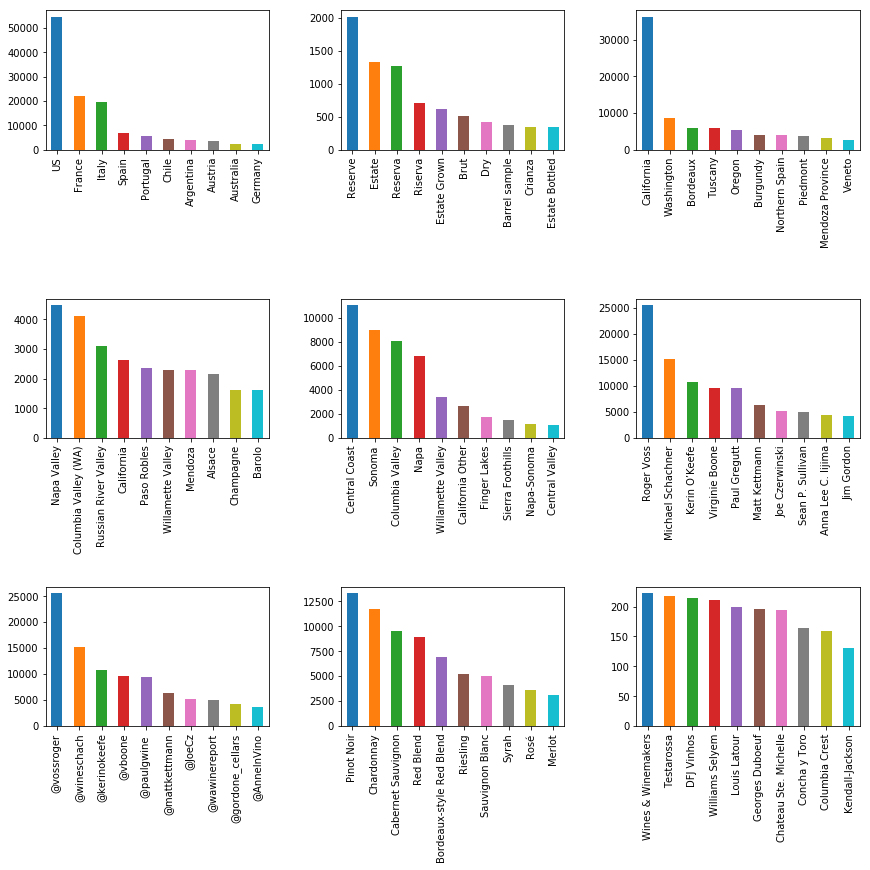

In [27]:
atts = ['country','designation','province','region_1','region_2','taster_name','taster_twitter_handle','variety','winery']
plt.figure(figsize=(12,12))
for i,att in enumerate(atts):
    plt.subplot(3,3,i+1)
    data_nom[att].value_counts().head(10).plot.bar()
plt.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)
plt.show()

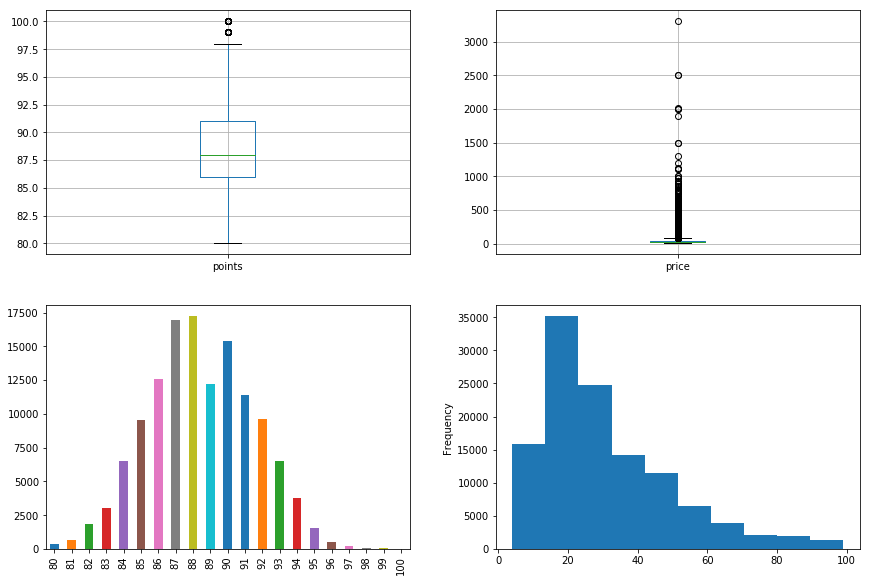

In [28]:
plt.figure(figsize=(12,8))
for i,att in enumerate(num_att):
    plt.subplot(2,2,i+1)
    DataFrame(data[att]).boxplot()
plt.subplot(2,2,3)
data['points'].value_counts().sort_index().plot.bar()
plt.subplot(2,2,4)
data[data['price']<100]['price'].plot.hist()
plt.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)
plt.show()

In [32]:
DataFrame(data.isnull().sum(),columns=['null_count']).T

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
null_count,63,0,37465,0,8996,63,21247,79460,26244,31213,0,1,0


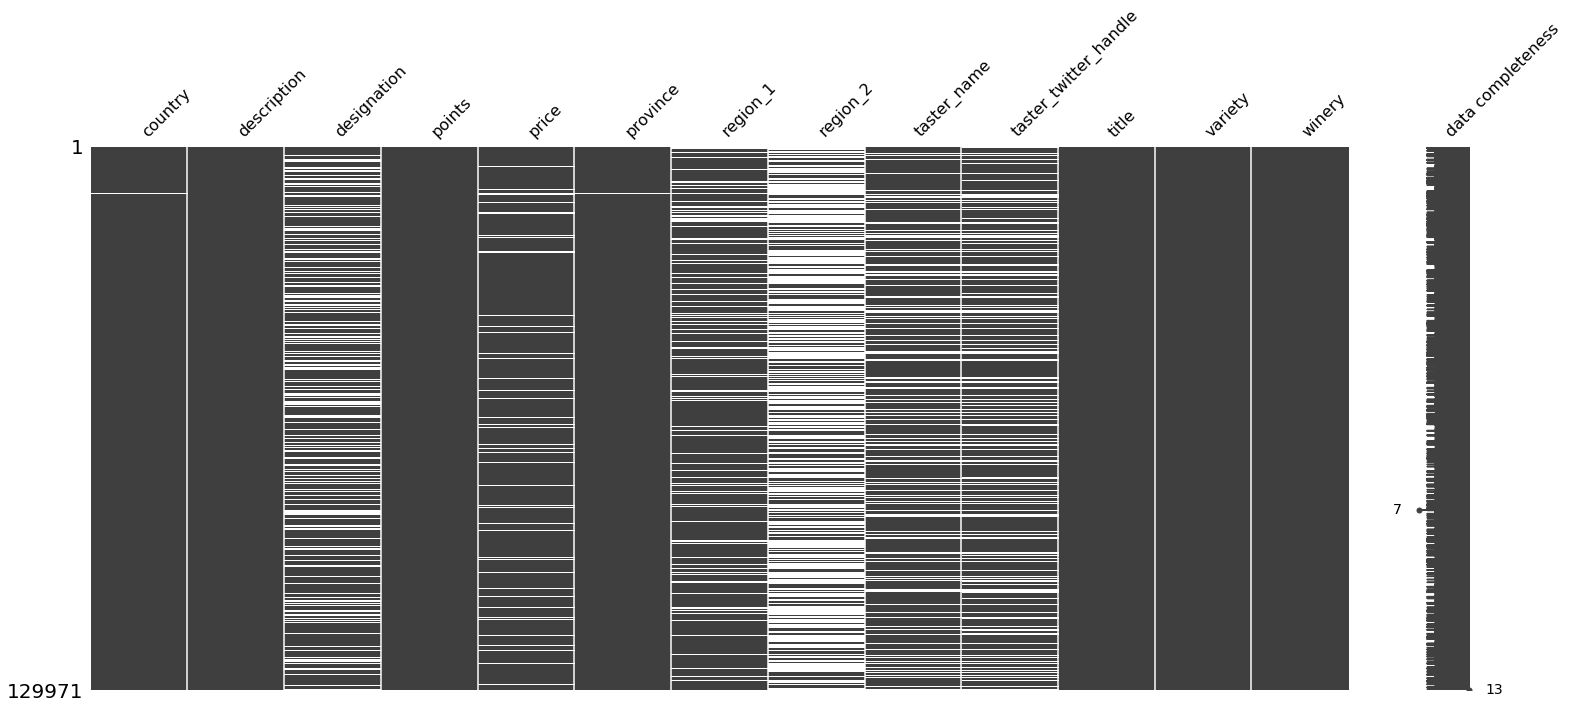

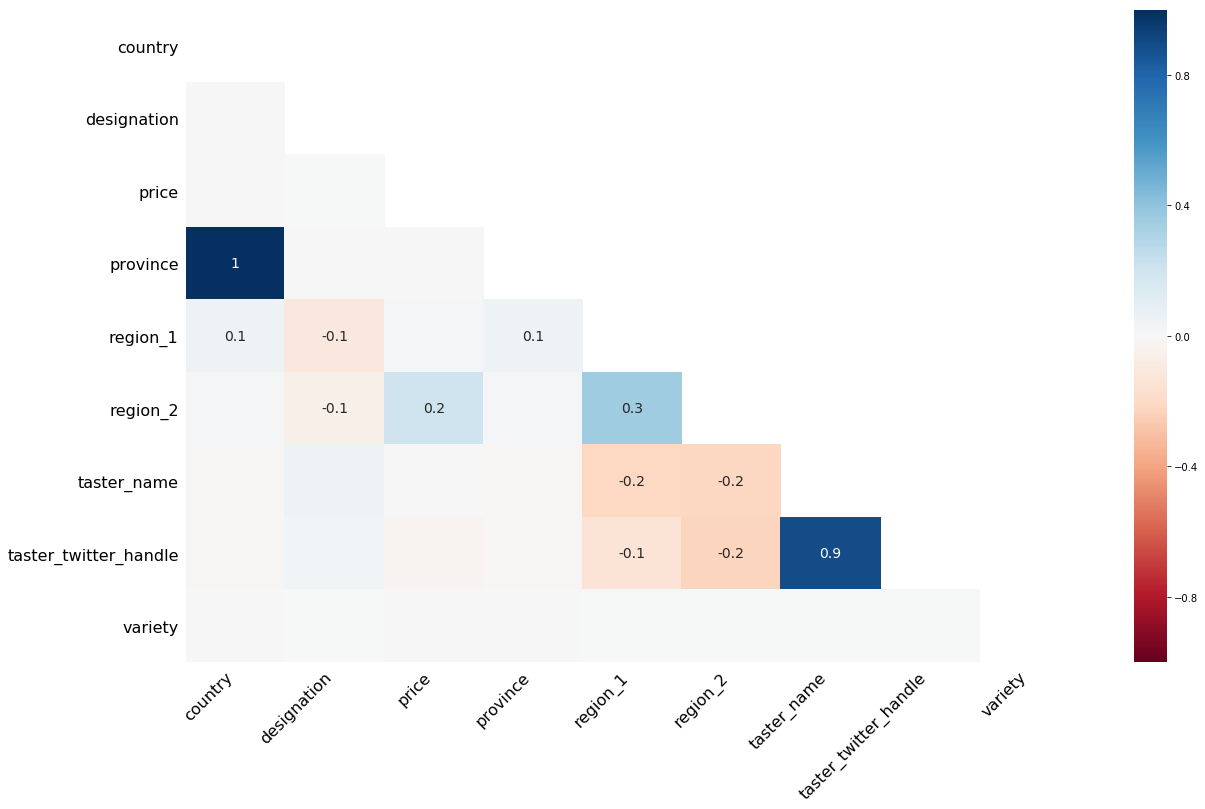

In [33]:
msno.matrix(data, labels=True)
msno.heatmap(data)

同版本一，国家、葡萄园、省份、地区一、地区二这五个属性是一一对应相关联的，不能利用单属性随意填充，同时新增的品尝者姓名以及推特名称的缺失也是相关联的，因此只有价格属性可以利用众数以及数据对象相似度填充，接下来进行缺失值填充

In [34]:
data1 = data.copy(deep = True)
data1.dropna(axis=0, how='any', inplace=True)
data2 = data.copy(deep = True)
data2['price'].fillna(data2['price'].mode()[0],inplace=True)

In [35]:
data3 = data.copy(deep = True)
unkonw = data3[data3['price'].isnull()]
loc = unkonw.index.tolist()[0] 
unkonw_nom = unkonw[nom_att]
unkonw_num = unkonw['points']
unkonw_isnull = unkonw.isnull()
konw = data3[data3['price'].notnull()]
konw_nom = konw[nom_att]
konw_num = konw['points']
konw_isnull = konw.isnull()

max_num = data3['points'].max()
min_num = data3['points'].min()
batch_size=1000
data_size = unkonw.shape[0]
n = int(data_size/batch_size)
res=[]
print('please waiting ......')
for i in range(n+1):
    start = i*batch_size
    end = min(start+batch_size,data_size)
    #print(str(start)+'---'+str(end))
    d_nom = (np.expand_dims(unkonw_nom[start:end],1)!= np.expand_dims(konw_nom,0)).sum(axis=2)
    d_nom = d_nom - (np.expand_dims(unkonw_isnull[nom_att][start:end],1) + np.expand_dims(konw_isnull[nom_att],0)).sum(axis=2)
    d_num=np.abs(np.expand_dims(unkonw_num[start:end],1)-np.expand_dims(konw_num,0))
    d_num=d_num/np.expand_dims(max_num-min_num,0)
    #d_num[np.isnan(d_nom)]=0
    #d_nom = d_nom.sum(axis=2)
    d_all = d_num + d_nom
    cnt = (1-(np.expand_dims(unkonw_isnull[start:end],1) + np.expand_dims(konw_isnull,0))).sum(axis=2)
    d = d_all/cnt
    res.extend(np.argmin(d,axis=1).tolist())
predicted = konw.iloc[res, 4]
data3.loc[(data3['price'].isnull()), 'price'] = predicted.values
display(pd.concat([DataFrame(unkonw.iloc[0]).T,DataFrame(konw.iloc[res[0]]).T,DataFrame(data3.iloc[loc]).T]))

please waiting ......


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,Aromas include tropic...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bi...,White Blend,Nicosia
52317,Italy,A blend of Carricante...,Fondo Filara,87,19,Sicily & Sardinia,Etna,NaN,NaN,NaN,Nicosia 2010 Fondo Fi...,White Blend,Nicosia
0,Italy,Aromas include tropic...,Vulkà Bianco,87,19,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bi...,White Blend,Nicosia


In [36]:
data4 = data.copy(deep = True)
col_list = ['country','designation','points','province','region_1','region_2','taster_name','taster_twitter_handle','title','variety','winery']
def processing(miss_col):
    if miss_col!='price':
        col_list.remove(miss_col)
    col_list.append(miss_col)
    process_df = data.loc[:, col_list].copy(deep = True)
    class_le = LabelEncoder()
    for i in col_list[:-1]:
        process_df.loc[:, i] = class_le.fit_transform(process_df.loc[:, i].values.astype(str))
    known = process_df[process_df[miss_col].notnull()].values
    known[:, -1] = class_le.fit_transform(known[:, -1])
    unknown = process_df[process_df[miss_col].isnull()].values
    X = known[:, :-1]
    y = known[:, -1]
    rfr = ensemble.RandomForestRegressor(random_state=1, n_estimators=200, max_depth=8, n_jobs=-1)
    rfr.fit(X, y)
    predicted = rfr.predict(unknown[:, :-1]).round(0).astype(int)
    predicted = class_le.inverse_transform(predicted)
    data4.loc[(data[miss_col].isnull()), miss_col] = predicted
processing('country')
processing('designation')
processing('price')
processing('province')
processing('region_1')
processing('region_2')
processing('taster_name')
processing('taster_twitter_handle')
processing('variety')

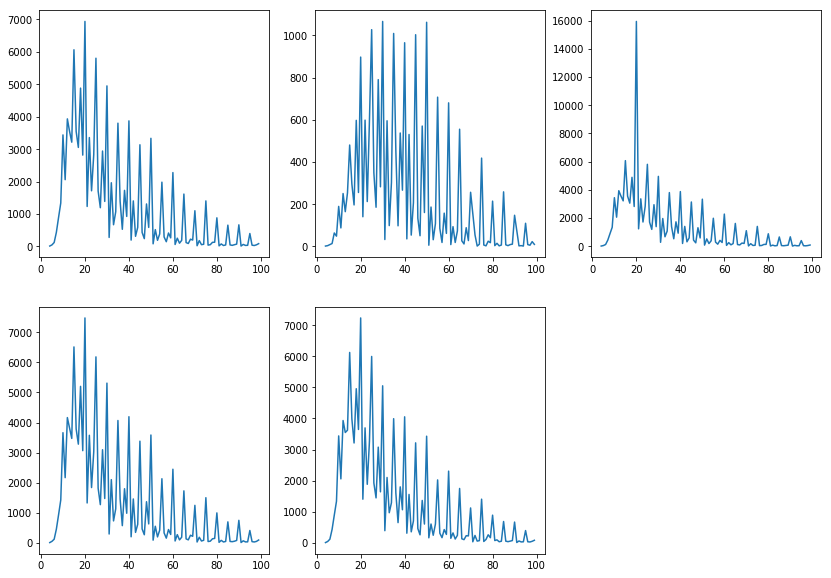

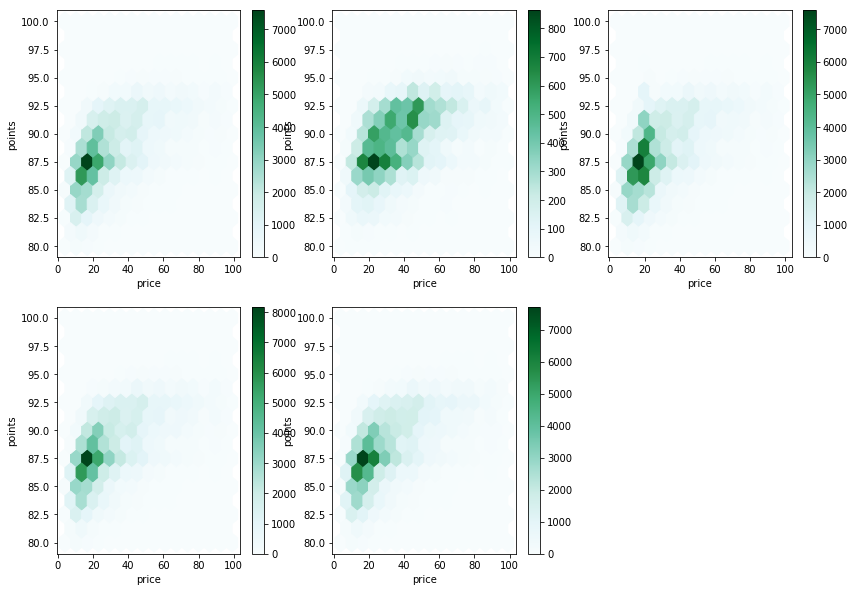

In [39]:
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
data[data['price'] < 100]['price'].value_counts().sort_index().plot.line()
plt.subplot(2,3,2)
data1[data1['price'] < 100]['price'].value_counts().sort_index().plot.line()
plt.subplot(2,3,3)
data2[data2['price'] < 100]['price'].value_counts().sort_index().plot.line()
plt.subplot(2,3,4)
data3[data3['price'] < 100]['price'].value_counts().sort_index().plot.line()
plt.subplot(2,3,5)
data4[data4['price'] < 100]['price'].value_counts().sort_index().plot.line()
fig = plt.figure(figsize=(14,10))
ax0 =fig.add_subplot(231)
ax1 =fig.add_subplot(232)
ax2 =fig.add_subplot(233)
ax3 =fig.add_subplot(234)
ax4 =fig.add_subplot(235)
data[data['price'] < 100].plot.hexbin(x='price', y='points', ax=ax0,gridsize=15)
data1[data1['price'] < 100].plot.hexbin(x='price', y='points', ax=ax1,gridsize=15)
data2[data2['price'] < 100].plot.hexbin(x='price', y='points', ax=ax2,gridsize=15)
data3[data3['price'] < 100].plot.hexbin(x='price', y='points', ax=ax3,gridsize=15)
data4[data4['price'] < 100].plot.hexbin(x='price', y='points', ax=ax4,gridsize=15)

可以看到由于新数据集新增了三个属性，因此在属性相关性填充时，随机森林得到了更多的输入信息，也使得最终的效果媲美通过数据对象相似填充的效果